In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
...,...,...,...,...
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN


In [4]:
gdp_df[:10]

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


In [5]:
gdp_df[-6:]

,Country or Area,Year,Value,Value Footnotes
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN
6868,footnoteSeqID,Footnote,NaN,NaN
6869,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [6]:
#Corrected read_csv
gdp_df = pd.read_csv("../data/gdp_per_capita.csv", skipfooter = 2,
                  engine = 'python')

In [7]:
gdp_df = gdp_df.drop(columns = "Value Footnotes")

In [8]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'Country', 'Year':'Year', 'Value': 'GDP_Per_Capita'})

In [9]:
print(gdp_df)

          Country  Year  GDP_Per_Capita
0     Afghanistan  2019     2065.036398
1     Afghanistan  2018     2033.779002
2     Afghanistan  2017     2058.383832
3     Afghanistan  2016     2057.062164
4     Afghanistan  2015     2068.265904
...           ...   ...             ...
6863     Zimbabwe  1994     3263.934978
6864     Zimbabwe  1993     3033.504852
6865     Zimbabwe  1992     3054.889178
6866     Zimbabwe  1991     3426.598094
6867     Zimbabwe  1990     3324.348171

[6868 rows x 3 columns]


In [10]:
type(gdp_df)

pandas.core.frame.DataFrame

In [11]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

In [12]:
#If any of the columns are not the expected types, figure out why and fix it.

gdp_df['Country'] = gdp_df['Country'].astype(str)

In [13]:
gdp_df.count()

Country           6868
Year              6868
GDP_Per_Capita    6868
dtype: int64

In [14]:
gdp_df.Country.value_counts()

Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

In [15]:
#Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [16]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


In [17]:
gdp_2014.shape

(238, 3)

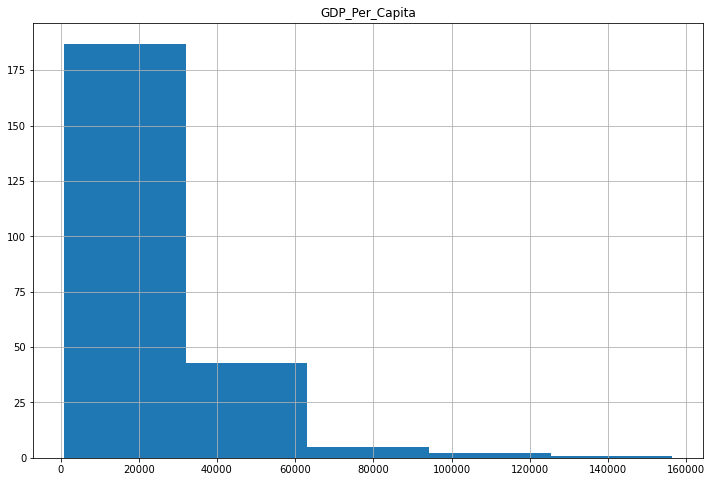

In [18]:
#Histogram of GDP Per Capita 2014 - The shape of the distribution is left skewed
gdp_2014.hist(column='GDP_Per_Capita',bins=5, figsize=(12,8))
plt.show()

In [19]:
# top 5 counties and bottom 5 countries by GDP per capita in 2014
gdp_2014[:5]

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
113,Antigua and Barbuda,2014,18104.241470


In [20]:
gdp_2014[-5:]

,Country,Year,GDP_Per_Capita
6727,Vietnam,2014,6098.489609
6757,West Bank and Gaza,2014,5967.073437
6783,World,2014,15189.648507
6813,Zambia,2014,3450.046561
6843,Zimbabwe,2014,2955.240287


In [21]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


In [22]:
#Pivot the data for 1990 and 2017 
gdp_pivoted = gdp_df[(gdp_df["Year"] >= 1990) & (gdp_df["Year"] <= 2017 )]
gdp_pivoted = gdp_pivoted.pivot_table(index='Country', columns='Year', values='GDP_Per_Capita', dropna=True)
gdp_pivoted = gdp_pivoted.dropna(axis=0)
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,9944.233283,10346.864199,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10796.901320,10782.361398,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7864.375304,7643.493749,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,23130.553123,20046.839017,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123
Arab World,9694.667544,9651.626577,9933.531454,9927.649928,9957.387061,9913.934988,10136.058519,10311.064917,10624.718674,10606.027497,...,13261.601944,13063.094140,13347.112066,13531.438796,14032.961703,14155.876986,14219.562395,14441.436785,14663.549625,14555.474921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2888.309393,2897.327707,2886.920558,2824.882319,2999.097317,2956.627999,2962.647258,3051.178566,3033.908413,2989.091261,...,3243.747862,3270.529800,3239.887824,3192.453639,3159.338400,3131.971868,3116.077025,3037.784742,3061.787240,3116.645194
Vietnam,1673.249634,1736.014139,1847.620675,1957.644497,2091.599402,2252.633886,2425.526266,2587.055148,2701.770578,2797.785536,...,4628.030244,4830.304958,5089.411248,5352.011422,5574.458880,5815.118920,6098.489609,6438.260271,6767.902495,7155.745829
World,9680.269697,9645.256163,9647.070526,9657.888486,9783.828893,9943.132889,10167.967706,10396.385330,10508.291266,10731.543649,...,13652.236548,13396.524163,13904.629132,14275.461871,14554.850133,14857.762340,15189.648507,15516.986524,15837.382961,16253.385518


In [23]:
#percent change in GDP_Per_Capita from 1990 to 2017. 
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]
gdp_pivoted

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,10346.864199,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,164.556297
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10782.361398,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353,34.197756
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7643.493749,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,26.411194
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,20046.839017,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123,28.335391
Arab World,9694.667544,9651.626577,9933.531454,9927.649928,9957.387061,9913.934988,10136.058519,10311.064917,10624.718674,10606.027497,...,13063.094140,13347.112066,13531.438796,14032.961703,14155.876986,14219.562395,14441.436785,14663.549625,14555.474921,50.138980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,2888.309393,2897.327707,2886.920558,2824.882319,2999.097317,2956.627999,2962.647258,3051.178566,3033.908413,2989.091261,...,3270.529800,3239.887824,3192.453639,3159.338400,3131.971868,3116.077025,3037.784742,3061.787240,3116.645194,7.905517
Vietnam,1673.249634,1736.014139,1847.620675,1957.644497,2091.599402,2252.633886,2425.526266,2587.055148,2701.770578,2797.785536,...,4830.304958,5089.411248,5352.011422,5574.458880,5815.118920,6098.489609,6438.260271,6767.902495,7155.745829,327.655604
World,9680.269697,9645.256163,9647.070526,9657.888486,9783.828893,9943.132889,10167.967706,10396.385330,10508.291266,10731.543649,...,13396.524163,13904.629132,14275.461871,14554.850133,14857.762340,15189.648507,15516.986524,15837.382961,16253.385518,67.902197


In [24]:
#countries that experienced a negative percent change in GDP per Capita from 1990 to 2017
(gdp_pivoted[2017] / gdp_pivoted[1990]) * 100

Country
Albania                264.556297
Algeria                134.197756
Angola                 126.411194
Antigua and Barbuda    128.335391
Arab World             150.138980
                          ...    
Vanuatu                107.905517
Vietnam                427.655604
World                  167.902197
Zambia                 159.119377
Zimbabwe                91.092925
Length: 207, dtype: float64

In [25]:
gdp_pivoted.loc[gdp_pivoted['Percent_Change']< 0]

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Brunei,71230.862143,71404.841658,72704.666223,70909.563397,71175.850137,72446.413958,72694.674833,69940.873963,67984.221114,68541.661380,...,66850.420501,67751.329783,69388.636944,69091.726801,66714.537886,64192.234008,63148.548867,60865.986945,60995.681114,-14.369026
Burundi,1184.842440,1215.886531,1202.107139,1105.228876,1044.715537,947.822368,861.482737,839.196845,870.044082,850.048016,...,831.564131,846.169527,852.502622,862.716086,877.274160,886.235777,825.205986,794.604574,773.571858,-34.710993
Central African Republic,1201.677234,1165.239450,1060.638246,1033.830619,1053.746606,1098.896607,1027.650659,1055.256506,1078.451654,1091.362361,...,1161.189475,1201.351375,1242.715645,1300.287637,824.943832,822.610458,852.749426,884.494417,912.802052,-24.039332
Comoros,3061.360665,2812.289135,2964.257464,2966.196546,2730.645761,2751.164083,2642.082954,2675.593277,2639.282366,2621.591167,...,2840.628679,2878.286403,2924.722771,2946.177804,3005.535176,2996.379345,2959.539971,2987.989053,3032.254682,-0.950753
Congo,5115.210903,5095.961614,5087.002267,4899.579377,4502.959478,4552.379904,4614.302664,4455.181770,4489.594472,4248.740318,...,4892.643387,5217.027267,5185.168510,5555.136302,5381.257189,5564.248211,5252.154163,4598.656999,4274.296414,-16.439488
Dem. Rep. Congo,1819.723315,1606.326515,1382.762098,1150.836259,1066.468119,1039.752990,1000.689081,921.422664,885.785915,828.209292,...,835.611696,865.684027,894.826518,926.787843,972.455893,1029.790785,1065.242410,1055.572955,1059.810775,-41.759785
Gabon,18179.265733,18770.642205,17704.420511,17917.062601,18099.344359,18514.653304,18702.981797,19284.428798,19465.245278,17297.892563,...,13934.829923,14415.499166,14883.441249,15082.613460,15342.172866,15437.273224,15510.070805,15359.809244,15006.764091,-17.451209
Guinea-Bissau,1994.669656,2049.613967,2025.799880,2022.604860,2042.457391,2088.247630,2284.373270,2386.291009,1683.251675,1667.634363,...,1713.762384,1747.242076,1839.700981,1760.886189,1770.478296,1740.890565,1800.068562,1864.259897,1925.237737,-3.480873
Haiti,3229.618638,3225.867045,2995.781030,2779.601440,2401.826183,2591.091811,2649.528359,2672.592351,2682.813535,2707.702387,...,2887.386675,2735.282517,2860.209386,2833.775523,2879.139991,2935.219647,2941.815531,2952.618729,2980.960856,-7.699292


In [26]:
gdp_pivoted.loc[gdp_pivoted['Percent_Change']> 0]

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Percent_Change
Country,,,,,,,,,,,,,,,,,,,,,
Albania,4842.734635,3507.746654,3275.444336,3610.520633,3934.375728,4486.152092,4924.905836,4414.631173,4834.778357,5492.654212,...,10346.864199,10783.816180,11088.087801,11263.851342,11397.576226,11623.866679,11916.422315,12331.127754,12811.759436,164.556297
Algeria,8746.352901,8431.385028,8383.770248,8027.376688,7792.085182,7935.179841,8116.962721,8074.759953,8360.150339,8506.345679,...,10782.361398,10970.705149,11078.240516,11233.534926,11319.097949,11512.705405,11696.963757,11826.164666,11737.409353,34.197756
Angola,5783.429064,5649.782130,5148.252824,3788.508107,3717.366881,4139.640473,4551.651329,4728.157560,4792.683851,4740.669833,...,7643.493749,7692.434616,7675.445768,8036.690482,8140.527851,8239.828837,8036.410610,7568.997643,7310.901738,26.411194
Antigua and Barbuda,15459.551675,15586.896172,15497.464744,15991.764201,16697.248772,15628.396992,16303.723892,16828.640823,17258.964856,17551.305968,...,20046.839017,18205.985369,17604.417102,17965.502327,17641.542533,18104.241470,18595.084904,19417.964819,19840.076123,28.335391
Arab World,9694.667544,9651.626577,9933.531454,9927.649928,9957.387061,9913.934988,10136.058519,10311.064917,10624.718674,10606.027497,...,13063.094140,13347.112066,13531.438796,14032.961703,14155.876986,14219.562395,14441.436785,14663.549625,14555.474921,50.138980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,3416.724096,3328.189782,2886.951480,2757.178524,2562.993905,2494.445713,2488.790383,2569.310381,2637.004996,2720.908670,...,4446.863606,4651.522962,4880.862629,5164.274222,5469.855953,5764.492705,6086.715742,6346.334778,6518.804687,90.791077
Vanuatu,2888.309393,2897.327707,2886.920558,2824.882319,2999.097317,2956.627999,2962.647258,3051.178566,3033.908413,2989.091261,...,3270.529800,3239.887824,3192.453639,3159.338400,3131.971868,3116.077025,3037.784742,3061.787240,3116.645194,7.905517
Vietnam,1673.249634,1736.014139,1847.620675,1957.644497,2091.599402,2252.633886,2425.526266,2587.055148,2701.770578,2797.785536,...,4830.304958,5089.411248,5352.011422,5574.458880,5815.118920,6098.489609,6438.260271,6767.902495,7155.745829,327.655604


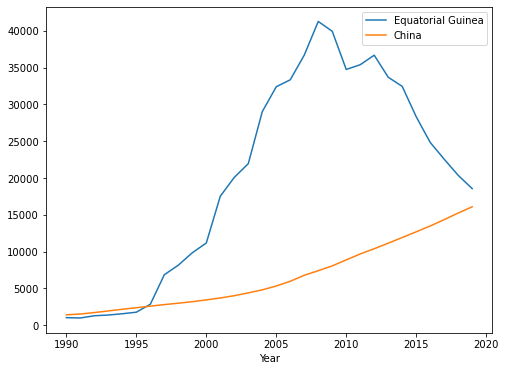

In [27]:
fig, ax = plt.subplots(figsize = (8, 6))
gdp_df[gdp_df['Country'] == 'Equatorial Guinea'].plot(x='Year', y='GDP_Per_Capita', ax = ax)
gdp_df[gdp_df['Country'] == 'China'].plot(x='Year', y='GDP_Per_Capita', ax = ax)
ax.legend(labels=['Equatorial Guinea', 'China'])
plt.show()